In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

In [23]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",3315.0
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",5176.0
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",17491.0
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",27914.0
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",12422.0


In [4]:
df.shape

(300698, 53)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 54 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      300698 non-null  int64         
 1   Created Date                    300698 non-null  datetime64[ns]
 2   Closed Date                     298534 non-null  datetime64[ns]
 3   Agency                          300698 non-null  object        
 4   Agency Name                     300698 non-null  object        
 5   Complaint Type                  300698 non-null  object        
 6   Descriptor                      294784 non-null  object        
 7   Location Type                   300567 non-null  object        
 8   Incident Zip                    298083 non-null  float64       
 9   Incident Address                256288 non-null  object        
 10  Street Name                     256288 non-null  object 

# Question2: Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)

In [6]:
df['Created Date'] = pd.to_datetime(df['Created Date']) 
df['Closed Date'] = pd.to_datetime(df['Closed Date'])

In [7]:
df['Request_Closing_Time'] = df['Closed Date'] -  df['Created Date']

In [8]:
df['Request_Closing_Time'] = df['Request_Closing_Time'].dt.seconds

In [9]:
df['Request_Closing_Time']

0          3315.0
1          5176.0
2         17491.0
3         27914.0
4         12422.0
           ...   
300693        NaN
300694     7231.0
300695    11237.0
300696    14733.0
300697    14929.0
Name: Request_Closing_Time, Length: 300698, dtype: float64

# Question3: Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

Insight1: Top 5 compaint Types

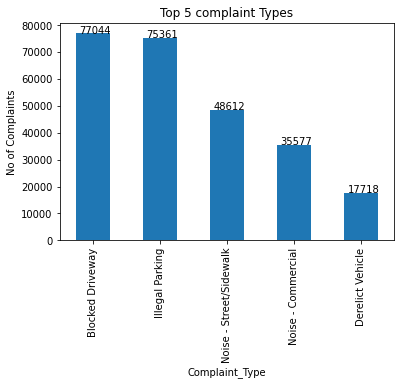

In [10]:
y = (df['Complaint Type'].value_counts()).head()
y.plot(kind = 'bar', title = 'Top 5 complaint Types', ylabel='No of Complaints', xlabel = 'Complaint_Type' )
for i, v in enumerate(y):
        plt.text(i-0.2,v,str(v) )

INsight2: Complaint count based on city

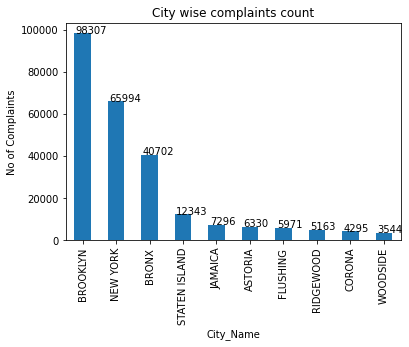

In [11]:
y = (df['City'].value_counts()).head(10)
y.plot(kind = 'bar', title = 'City wise complaints count', ylabel='No of Complaints', xlabel = 'City_Name' )
for i, v in enumerate(y):
        plt.text(i-0.2,v,str(v) )

Insight3: Complaints distrubution based on Borough

<AxesSubplot:title={'center':'Complaint Distrubution'}>

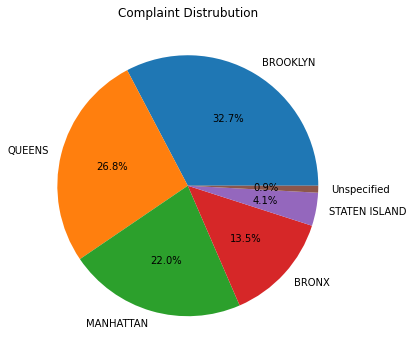

In [12]:
y = (df['Borough'].value_counts()).head(10)
y.plot(kind = 'pie', title = 'Complaint Distrubution', figsize=(8,6), ylabel = '', autopct = '%1.1f%%')


Insight4: Agency wise complaint count

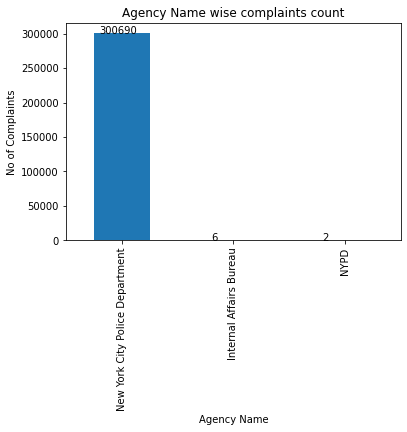

In [13]:
y = (df['Agency Name'].value_counts()).head(10)
y.plot(kind = 'bar', title = 'Agency Name wise complaints count', ylabel='No of Complaints', xlabel = 'Agency Name' )
for i, v in enumerate(y):
        plt.text(i-0.2,v,str(v) )

Insight5: Blocked Driveway complaint distribution across BROOKLYN

(-74.04994270070343, -73.84653002929657, 40.5645918345, 40.7464960955)

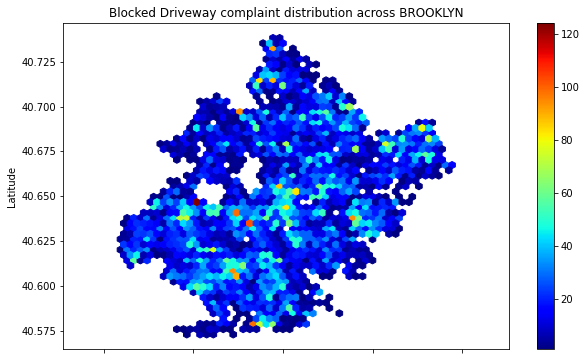

In [14]:
new_df = df[df['Borough'] == 'BROOKLYN']
new_df1 = new_df[new_df['Complaint Type'] == 'Blocked Driveway']
new_df1.plot(kind = 'hexbin' , x = 'Longitude', y = 'Latitude', colormap = 'jet', mincnt = 1, figsize= (10,6), gridsize = 50, title= 'Blocked Driveway complaint distribution across BROOKLYN').axis('equal')

# Q4: Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [15]:
df1 = df[['City','Complaint Type','Request_Closing_Time']]
group = df1.groupby(by=['City','Complaint Type']).mean()
group.sort_values(by=['City','Request_Closing_Time','Complaint Type'])


Request_Closing_Time
City     Complaint Type                               
ARVERNE  Drinking                           859.000000
         Vending                           1740.000000
         Urinating in Public               2491.000000
         Panhandling                       3720.000000
         Noise - Park                      4620.000000
...                                                ...
Woodside Noise - Commercial                8619.000000
         Noise - Street/Sidewalk          12280.600000
         Derelict Vehicle                 17880.000000
         Illegal Parking                  17925.130000
         Blocked Driveway                 23062.363636

[764 rows x 1 columns]

# Q5: Perform a statistical test for the following 

Whether the average response time across complaint types is similar or not (overall)

<AxesSubplot:xlabel='Complaint Type'>

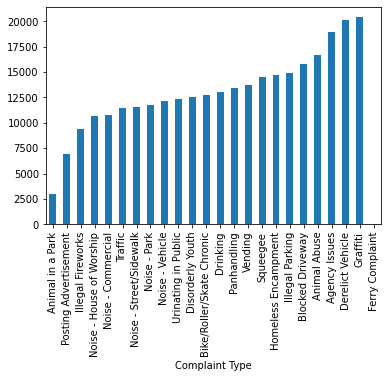

In [16]:
Complaint_close_time = df.groupby(by=['Complaint Type']).Request_Closing_Time.mean().sort_values()
Complaint_close_time.plot(kind = 'bar')


As per data average response time across complaint types is not similar

Ho: Average response time across complaint types is similar
    

H1:Average response time across complaint types is not similar

As per above data samples, average response time across complaint types is not similar, hence rejected Null hypothesis

Anova test will help to prove Rejected NULL Hypothesis statistically

In [100]:
from scipy.stats import f_oneway

In [17]:
dataset = df[['Complaint Type', 'Request_Closing_Time']]
dataset

,Complaint Type,Request_Closing_Time
0,Noise - Street/Sidewalk,3315.0
1,Blocked Driveway,5176.0
2,Blocked Driveway,17491.0
3,Illegal Parking,27914.0
4,Illegal Parking,12422.0
...,...,...
300693,Noise - Commercial,NaN
300694,Blocked Driveway,7231.0
300695,Noise - Commercial,11237.0
300696,Noise - Commercial,14733.0


In [36]:
import pingouin as pg
aov = pg.anova(dv = 'Request_Closing_Time', between ='Complaint Type', data = dataset, detailed = True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,Complaint Type,1.824365e+12,22,8.292568e+10,443.372575,0.0,0.031642
1,Within,5.583167e+13,298511,1.870339e+08,NaN,NaN,NaN


In [53]:
aov.iloc[0]['F']

443.3725745695142

In [54]:
fdist = stats.f

In [55]:
fdist.cdf(aov.iloc[0]['F'], aov.iloc[0]['DF'], aov.iloc[1]['DF'])

0.9999999999999999

Since p_value falls in critical region Hence Reject NULL Hypothesis

Hence concluded that average response time across complaint types is not similar